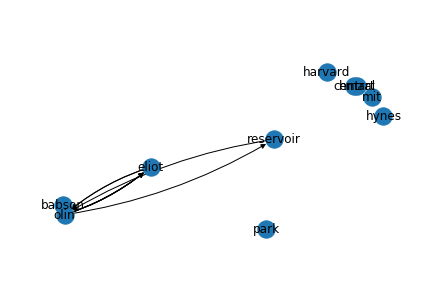

In [52]:
import networkx as nx
from datastructure import LocationNode, TransitEdge, Timing
import matplotlib.pyplot as plt
import json

with open('map.json') as f: data = json.load(f)

G = nx.MultiDiGraph()

for place in data['places']:
    G.add_node(place['name'], node=LocationNode(coords=tuple(place['coords'])))
    if 'transit' in place:
        
        for destination in place['transit']:
            direction = destination.pop(0)
            to = destination.pop(0)
            for mode in destination:
                if direction == 'tofrom':
                    G.add_edge(place['name'], to, path = TransitEdge())
                    G.add_edge(to, place['name'], path = TransitEdge())
                elif direction == 'to':
                    G.add_edge(place['name'], to, path = TransitEdge())




# G.nodes(data=True)

G.add_edge('olin', 'eliot', path = TransitEdge(calories=100))
G.add_edge('olin', 'babson', path = TransitEdge(calories=10))
G.add_edge('olin', 'eliot', path = TransitEdge(calories=200))

# print(G.edges[olin, eliot, 0]['path'].calories)

# pos = nx.spring_layout(G)
pos = {i:G.nodes[i]['node'].coords for i in nx.get_node_attributes(G, 'node')}


# edge_labels=dict([((u,v,),d['length']) for u,v,d in G.edges(data=True)])
# labels={i:i.name for i in G.nodes()}

nx.draw(G, pos, with_labels=True, connectionstyle='arc3, rad = 0.1')
# nx.draw_networkx_edge_labels(G, pos, label_pos=0.3, font_size=7)

plt.show()